#### __***SALIENCY MAPS & LRP***__

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [4]:
base_path = 'data/PetImages/'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
params = dict(target_size=(150, 150), batch_size=32, class_mode='binary')

In [5]:
train_gen = datagen.flow_from_directory(base_path, subset='training', **params)
val_gen = datagen.flow_from_directory(base_path, subset='validation', **params)

Found 121 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.4442 - loss: 1.1647 - val_accuracy: 0.6897 - val_loss: 0.6363
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 538ms/step - accuracy: 0.6332 - loss: 0.6432 - val_accuracy: 0.6897 - val_loss: 0.6083
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 0.6677 - loss: 0.6129 - val_accuracy: 0.6897 - val_loss: 0.6139
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 490ms/step - accuracy: 0.6745 - loss: 0.5724 - val_accuracy: 0.6897 - val_loss: 0.6237
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.6914 - loss: 0.5203 - val_accuracy: 0.6552 - val_loss: 0.6432


In [7]:
sample_image, label = next(val_gen)
img = sample_image[0]
img_batch = np.expand_dims(img, axis=0)
img_tensor = tf.convert_to_tensor(img_batch)

##### __***Saliency Map***__

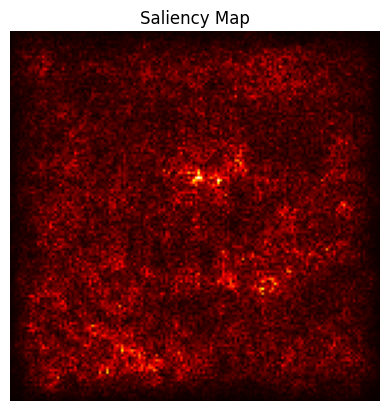

In [8]:
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    loss = model(img_tensor)[0]
saliency = np.max(np.abs(tape.gradient(loss, img_tensor)[0].numpy()), axis=-1)
plt.imshow(saliency, cmap='hot')
plt.title("Saliency Map")
plt.axis('off')
plt.show()

##### __***LRP (Gradient × Input)***__

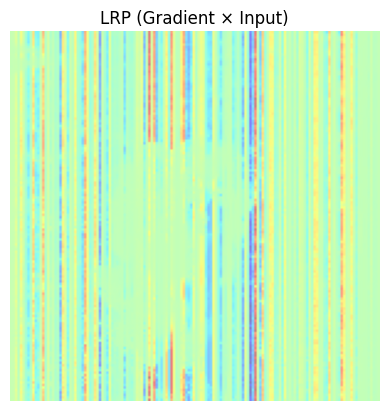

In [9]:
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    loss = model(img_tensor)[0]
grads = tape.gradient(loss, img_tensor)[0].numpy()
lrp_map = np.sum(grads[0] * img, axis=-1)
plt.imshow(lrp_map, cmap='jet', alpha=0.5)
plt.title("LRP (Gradient × Input)")
plt.axis('off')
plt.show()